In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('../../data/RREAE_5k_raw_integration_processed.h5ad')

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [22]:
tier2_map = {
    "Neurons": "Neurons",
    "T cells": "T cells",
    "B cells": "B cells",
    "APCs": "APC/DC",
    "Dendritic cells": "APC/DC",

    "Macrophages": "Macrophages/Myeloid",
    "Myeloid cells": "Macrophages/Myeloid",
    "Efflux Mic_Mac": "Macrophages/Myeloid",
    "Foamy Mic_Mac": "Macrophages/Myeloid",
    "Activate Mic_Mac 1": "Macrophages/Myeloid",
    "Activated Mic_Mac 2": "Macrophages/Myeloid",

    "Microglia": "Microglia",
    "Proliferating microglia": "Microglia",

    "Astrocytes": "Astrocytes",
    "Astrocyte": "Astrocytes",
    "DA astrocytes": "Astrocytes",
    "Mic_AST": "Mic_AST",  # mixed microglia–astro signature → keep under DA astrocytes

    "Oligodendrocytes": "Oligodendrocytes",
    "DA oligodendrocytes": "Oligodendrocytes",
    "DA Oligodendrocytes": "Oligodendrocytes",
    "Newly formed oligodendrocytes": "Newly formed oligodendrocytes",
    "OPCs": "OPCs",
    "Schwann cells": "Schwann cells",

    "Endothelial cells": "Endothelial",
    "Vascular cells": "Endothelial",

    "Fibroblasts": "Fibroblasts",
    "Stromal cells": "Stromal",

    "Ependymal cells": "Ependymal",
    "unclear": "Unclassified",
}
adata.obs['cell_type_reduced'] = adata.obs['cell_type'].map(tier2_map).fillna("Unclassified")

In [23]:
adata_RR = adata[adata.obs.model == 'RR']
adata_chronic = adata[adata.obs.model != 'RR']

In [24]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1",'Sirt2']


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


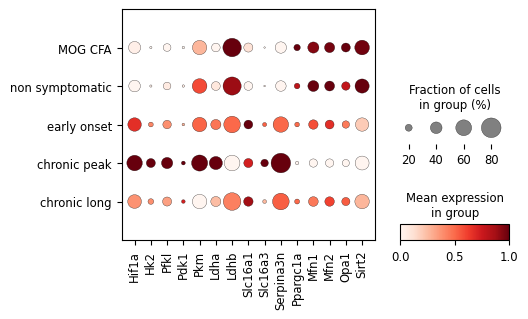

In [25]:
 sc.pl.dotplot(
        adata_chronic,
        var_names=genes,
        groupby="course",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=False,
        figsize=(5, 3),
        categories_order=['MOG CFA','non symptomatic',
   'early onset',
   'chronic peak',
   'chronic long'],
    )

In [26]:
MODELS = {'MOG': {'baseline': 'MOG CFA',
  'courses': ['non symptomatic',
   'early onset',
   'chronic peak',
   'chronic long']},
 'PLP': {'baseline': 'PLP CFA',
  'courses': ['onset I',
   'onset II',
   'peak I',
   'monophasic',
   'remitt I',
   'peak II',
   'remitt II',
   'peak III']}}

genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1",'Sirt2']


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


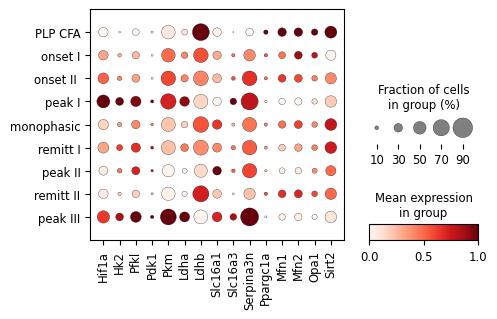

In [27]:
 sc.pl.dotplot(
        adata_RR,
        var_names=genes,
        groupby="course",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=False,
        figsize=(5, 3),
        categories_order=['PLP CFA','onset I',
   'onset II ',
   'peak I',
   'monophasic',
   'remitt I',
   'peak II',
   'remitt II',
   'peak III'],
    )

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


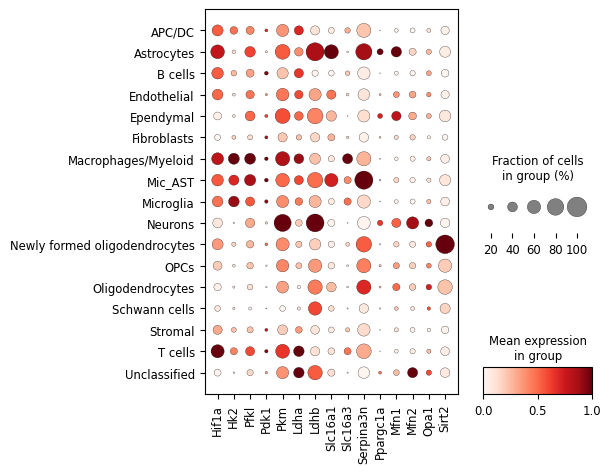

In [29]:
 sc.pl.dotplot(
        adata_RR,
        var_names=genes,
        groupby="cell_type_reduced",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=False,
        figsize=(5, 5),
        
    )

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


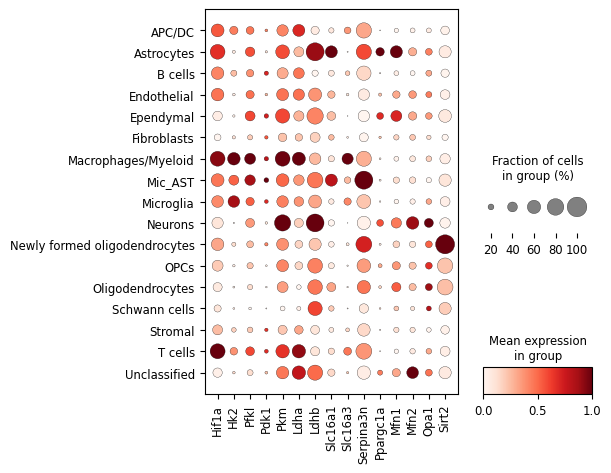

In [30]:
 sc.pl.dotplot(
        adata_chronic,
        var_names=genes,
        groupby="cell_type_reduced",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=False,
        figsize=(5, 5),
        
    )